In [244]:
import sklearn
import pandas as pd
from fastai.imports import *
from fastai.structured import *

In [245]:
main_raw = pd.read_csv('/home/orange/MLHoli/Competitions/Data/train.csv')
meal_raw = pd.read_csv('/home/orange/MLHoli/Competitions/Data/meal_info.csv')
center_raw = pd.read_csv('/home/orange/MLHoli/Competitions/Data/fulfilment_center_info.csv')

In [246]:
df_raw = pd.merge(main_raw, meal_raw,how='outer', on='meal_id')

In [247]:
df_raw = pd.merge(df_raw, center_raw, how='outer', on='center_id')

In [248]:
df_cat = pd.get_dummies(df_raw, columns=['meal_id', 'center_id', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'center_type'])

In [249]:
df_cat['week_mod4'] = df_cat.week % 4

In [250]:
df_cat['week_mod52'] = df_cat.week % 52

In [251]:
df_cat['discount'] = df_cat.base_price - df_cat.checkout_price

In [252]:
df_cat['discount_percent'] = df_cat.discount *100 / df_cat.base_price

In [253]:
df_cat['week_mod5'] = df_cat.week % 5

In [254]:
df_cat.drop('id', axis=1, inplace=True)

In [255]:
df_cat.drop('week', axis=1, inplace=True)

In [256]:
df_trn, y_trn, nas = proc_df(df_cat, 'num_orders')

In [257]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

size_train = int(len(df_trn)*0.7)
x_train, x_valid = split_vals(df_trn, size_train)
y_train, y_valid = split_vals(y_trn, size_train)

In [266]:
def print_score(m):
    return metrics.mean_squared_log_error(y_valid, m.predict(X_valid))*100

In [260]:
m = ensemble.RandomForestRegressor(n_jobs=-1, max_features=0.3, min_samples_leaf=3, n_estimators=120, oob_score=False)
m.fit(x_train, y_train)
print_score(m)

39.164023119915

In [215]:
test_main_raw = pd.read_csv('/home/orange/MLHoli/Competitions/Data/test_QoiMO9B.csv')

test_raw = pd.merge(test_main_raw, meal_raw,how='outer', on='meal_id')

test_raw = pd.merge(test_raw, center_raw, how='outer', on='center_id')

#test_cat = pd.get_dummies(test_raw, columns=['meal_id', 'center_id', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'center_type'])

test_cat = test_raw

test_cat['week_mod4'] = test_cat.week % 4

test_cat['week_mod52'] = test_cat.week % 52

test_cat['discount'] = test_cat.base_price - test_cat.checkout_price

test_cat['discount_percent'] = test_cat.discount *100 / test_cat.base_price

item_no = test_cat.id

test_cat.drop('id', axis=1, inplace=True)

train_cats(test_cat)

preds = m.predict(test_cat)

res = pd.DataFrame(preds)

res['id'] = item_no

res['num_orders'] = preds

res.head()

res.columns

res.drop(0, axis=1, inplace=True)

res.head()

res.to_csv('/home/orange/Desktop/result.csv')

In [ ]:
df_cat['week_mod4'] = df_cat.week % 4

In [261]:
fi = rf_feat_importance(m, x_train); fi[:25]

,cols,imp
0,checkout_price,0.116916
4,op_area,0.088000
1,base_price,0.074354
145,category_Rice Bowl,0.057660
35,meal_id_2290,0.050148
161,discount_percent,0.045976
136,homepage_featured_1,0.040912
135,homepage_featured_0,0.036993
160,discount,0.034629
134,emailer_for_promotion_1,0.030727


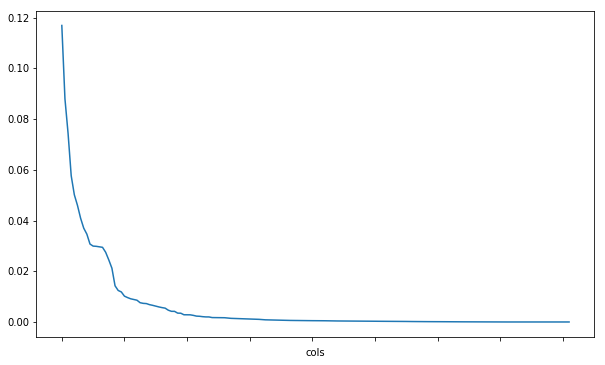

In [262]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

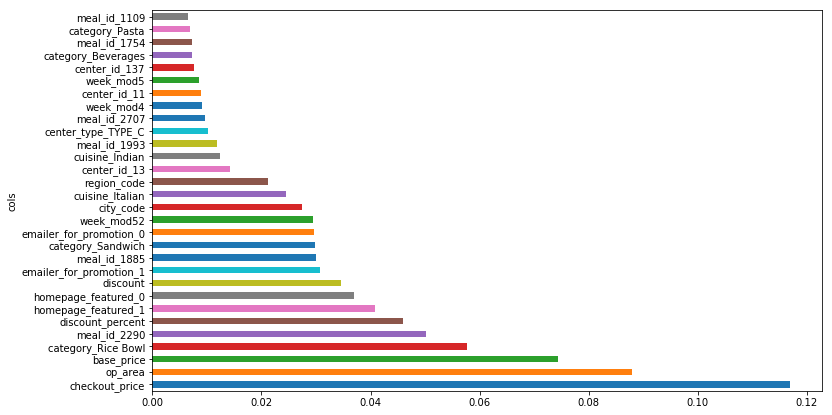

In [263]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [183]:
import numpy as np

In [239]:
main_raw['mod5'] = main_raw.week % 5

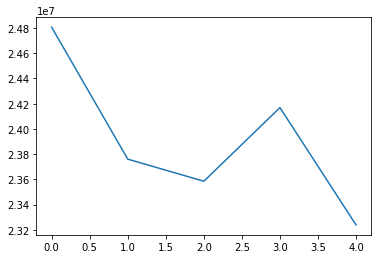

In [243]:
plt.plot(np.arange(0,5), main_raw.groupby('mod5').sum()['num_orders'])

In [271]:
df_trn.shape

(456548, 163)

In [270]:
x_train.shape

(319583, 163)

(32573, 17)